# About Competitions
 
In this competition , I will develop accurate models of metered building energy usage in the following areas:chilled water,electric, hot water and steam meters. The data comes from over 1000 buidings over three year timeframe.With better estimates of these energy saving investments, large scale investors and financial institutions will more inclined to invest in this area to enable progress in building efficiencies.


# About The Host

This competitions is organised by ASHRAE.This is founded in 1894. ASHRAE serves to advance the arts and sciences of heating,ventilation, air conditioning refrigeration and their allied fields. ASHRAE members represent building system design and industrial process professional around the world.With over 54000 members serving in 132 countries.ASHRAE supports research ,standard writing , publishing and continuing education shaping tommorrow's built environment today.

# Import Packages

In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/historical-hourly-weather-data/weather_description.csv
/kaggle/input/historical-hourly-weather-data/pressure.csv
/kaggle/input/historical-hourly-weather-data/city_attributes.csv
/kaggle/input/historical-hourly-weather-data/humidity.csv
/kaggle/input/historical-hourly-weather-data/wind_speed.csv
/kaggle/input/historical-hourly-weather-data/temperature.csv
/kaggle/input/historical-hourly-weather-data/wind_direction.csv
/kaggle/input/ashrae-energy-prediction/weather_test.csv
/kaggle/input/ashrae-energy-prediction/building_metadata.csv
/kaggle/input/ashrae-energy-prediction/train.csv
/kaggle/input/ashrae-energy-prediction/test.csv
/kaggle/input/ashrae-energy-prediction/sample_submission.csv
/kaggle/input/ashrae-energy-prediction/weather_train.csv


In [35]:
import matplotlib.pyplot as plt

import datetime
import gc
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [36]:
path='/kaggle/input/ashrae-energy-prediction/'

In [37]:
#weather train
weather_train=pd.read_csv(path+'weather_train.csv')
display(weather_train.shape)
display(weather_train.head())
display(weather_train.columns)
display(weather_train.dtypes)
#check index
display(weather_train['site_id'].is_unique)

(139773, 9)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


Index(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')

site_id                 int64
timestamp              object
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

False

In [38]:
#wearher test
weather_test=pd.read_csv(path+'weather_test.csv')
display(weather_test.shape)
display(weather_test.head())
display(weather_test.columns)
display(weather_test.dtypes)
# check for index
display(weather_test['site_id'].is_unique)

(277243, 9)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


Index(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')

site_id                 int64
timestamp              object
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

False

In [39]:
#Merge weather_train & Weather_test
weather_merged=weather_train.append(weather_test)
weather_merged['timestamp']=pd.to_datetime(weather_merged['timestamp'])
weather_merged.set_index('timestamp',inplace=True)
display(weather_merged.shape)
display(weather_merged.columns)
display(weather_merged.head())

(417016, 8)

Index(['site_id', 'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'],
      dtype='object')

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-01-01 00:00:00,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 01:00:00,0,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2016-01-01 02:00:00,0,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
2016-01-01 03:00:00,0,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
2016-01-01 04:00:00,0,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [40]:
#extract wind speed from weather data
wind_speed_pivot=weather_merged.reset_index().pivot_table(index='timestamp',columns='site_id',values='wind_speed')
wind_speed_pivot.columns='site_'+wind_speed_pivot.columns.astype('str')
wind_speed_pivot

site_id,site_0,site_1,site_2,site_3,site_4,site_5,site_6,site_7,site_8,site_9,site_10,site_11,site_12,site_13,site_14,site_15
timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,3.1,3.6,4.1,NaN,NaN,NaN,1.5,0.0,NaN,NaN,1.5,5.0,4.1,NaN,NaN
2016-01-01 01:00:00,1.5,2.6,4.1,6.2,3.1,2.6,0.0,1.0,1.5,3.1,0.0,1.0,3.0,4.1,2.6,4.1
2016-01-01 02:00:00,0.0,0.0,3.1,4.6,0.0,1.5,3.6,0.5,0.0,2.1,0.0,0.5,3.0,3.1,2.6,2.6
2016-01-01 03:00:00,0.0,1.5,3.1,7.7,1.5,2.6,3.1,1.5,0.0,3.6,2.6,1.5,4.0,4.1,1.5,2.1
2016-01-01 04:00:00,2.6,1.5,3.1,4.1,0.0,4.1,2.1,2.1,2.6,3.6,1.5,2.1,3.0,4.1,3.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,5.7,4.1,4.6,2.1,6.2,5.7,0.0,3.1,5.7,3.1,3.6,3.1,4.0,7.2,3.1,7.7
2018-12-31 20:00:00,5.7,4.1,3.6,1.5,6.7,4.6,1.5,4.1,5.7,2.6,6.2,4.1,5.0,8.2,3.6,5.1
2018-12-31 21:00:00,4.6,3.6,3.1,1.5,7.2,6.2,0.0,3.1,4.6,1.5,4.6,3.1,6.0,8.2,4.6,6.2


In [41]:
#load external wind speed data
speed_external = pd.read_csv("../input/historical-hourly-weather-data/wind_speed.csv")
speed_external['datetime'] = pd.to_datetime(speed_external['datetime'])
speed_external.set_index('datetime', inplace=True)

speed_external = speed_external.merge(wind_speed_pivot, left_index=True, right_index=True, how='inner')
speed_external = speed_external.dropna()

speed_external

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,site_6,site_7,site_8,site_9,site_10,site_11,site_12,site_13,site_14,site_15
2016-01-01 01:00:00,1.0,9.0,3.0,1.0,5.0,3.0,6.0,1.0,2.0,1.0,...,0.0,1.0,1.5,3.1,0.0,1.0,3.0,4.1,2.6,4.1
2016-01-01 02:00:00,1.0,6.0,3.0,1.0,3.0,2.0,4.0,1.0,1.0,1.0,...,3.6,0.5,0.0,2.1,0.0,0.5,3.0,3.1,2.6,2.6
2016-01-01 03:00:00,1.0,8.0,6.0,2.0,1.0,1.0,4.0,3.0,6.0,3.0,...,3.1,1.5,0.0,3.6,2.6,1.5,4.0,4.1,1.5,2.1
2016-01-01 12:00:00,2.0,10.0,3.0,2.0,1.0,1.0,6.0,3.0,3.0,2.0,...,0.0,2.1,1.5,4.1,4.6,2.1,14.0,5.1,2.6,2.6
2016-01-01 13:00:00,2.0,12.0,3.0,4.0,1.0,1.0,7.0,3.0,5.0,3.0,...,1.5,3.6,0.0,4.6,3.6,3.6,13.0,3.6,1.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-27 20:00:00,2.0,6.0,0.0,2.0,0.0,3.0,2.0,2.0,1.0,1.0,...,3.6,2.6,5.7,4.6,2.1,2.6,5.0,8.2,4.1,6.2
2017-10-27 21:00:00,2.0,8.0,2.0,3.0,1.0,3.0,2.0,2.0,1.0,2.0,...,4.1,2.6,5.1,4.1,3.6,2.6,5.0,10.3,2.6,5.1
2017-10-27 22:00:00,4.0,8.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,2.0,...,2.6,3.1,5.1,4.6,4.1,3.1,5.0,8.8,2.6,7.2
2017-10-27 23:00:00,0.0,6.0,2.0,3.0,2.0,4.0,2.0,2.0,1.0,1.0,...,0.0,2.6,4.1,4.6,3.6,2.6,7.0,8.8,2.1,7.2


In [42]:
#calculate correlations between sites
df_corr = speed_external.corr(method='spearman')
list_site = wind_speed_pivot.columns
df_corr = df_corr[list_site]
df_corr = df_corr.drop(list_site)
df_corr

,site_0,site_1,site_2,site_3,site_4,site_5,site_6,site_7,site_8,site_9,site_10,site_11,site_12,site_13,site_14,site_15
Vancouver,0.060937,0.037580,-0.023394,0.045153,0.054000,-0.011596,0.057102,0.050719,0.060937,0.043294,0.028454,0.050719,0.006588,0.049778,0.045905,0.059929
Portland,0.097054,-0.035863,0.034788,0.018121,0.164604,-0.035881,0.019989,0.020586,0.097054,0.102547,0.021665,0.020586,-0.078954,0.078306,0.025581,0.012648
San Francisco,0.085243,-0.015752,0.060899,0.064800,0.365498,-0.014857,0.096490,0.044146,0.085243,0.126998,0.062275,0.044146,-0.033469,0.069358,0.070086,0.023501
Seattle,0.117352,-0.034512,0.004135,0.074038,0.112458,-0.044803,0.086317,0.072190,0.117352,0.073550,0.048474,0.072190,-0.074778,0.079755,0.082961,0.075920
Los Angeles,0.181312,-0.078859,0.206525,0.085276,0.354159,-0.066720,0.112662,0.095588,0.181312,0.211681,0.014949,0.095588,-0.130032,0.121290,0.097550,0.027578
San Diego,0.202292,-0.030722,0.195526,0.087200,0.344840,-0.036274,0.118153,0.068797,0.202292,0.192703,0.029143,0.068797,-0.093697,0.126605,0.101207,0.021714
Las Vegas,0.070429,-0.013349,0.157703,0.002782,0.224238,-0.006052,0.029037,-0.006866,0.070429,0.132408,0.084721,-0.006866,-0.029381,0.042642,0.021594,-0.030735
Phoenix,0.031799,-0.040254,0.317895,-0.030455,0.126612,-0.052691,-0.024226,-0.014386,0.031799,0.092087,0.060857,-0.014386,-0.077589,0.015971,-0.026805,-0.084581
Albuquerque,0.014589,-0.060356,0.134478,-0.015472,0.160247,-0.038242,0.004946,-0.023186,0.014589,0.160910,0.060139,-0.023186,-0.039600,0.076029,-0.024436,-0.042367
Denver,0.098332,-0.009507,0.048221,0.041149,0.097985,-0.007515,0.069872,0.041800,0.098332,0.106083,0.044193,0.041800,-0.010566,0.120124,0.055493,0.033708


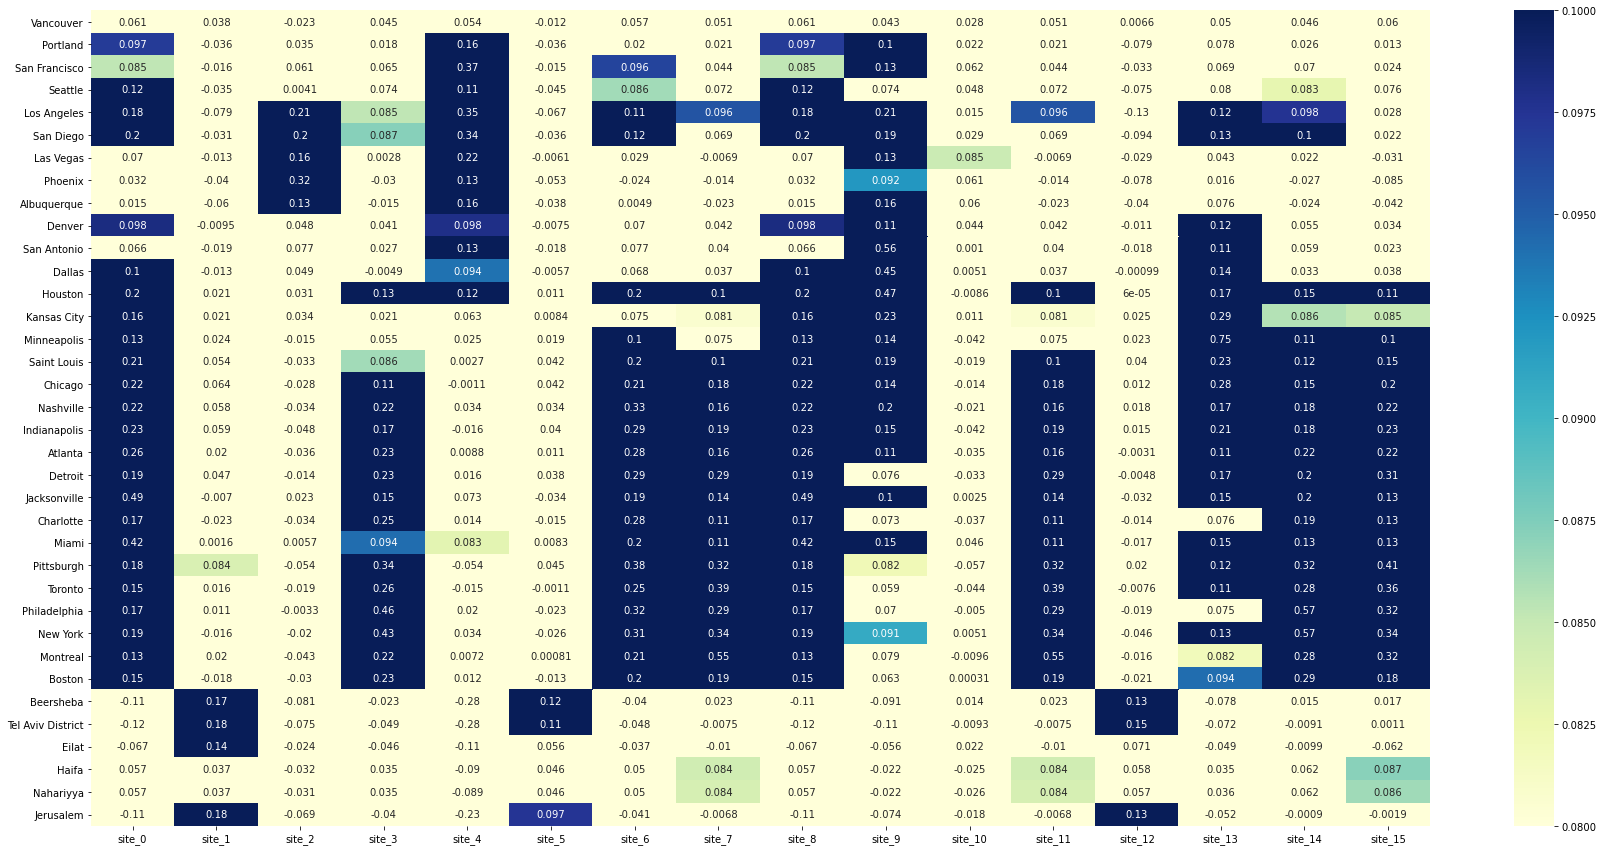

In [43]:
#sns heat map
fig, ax = plt.subplots(figsize=(30,15))   
sns.heatmap(df_corr, annot=True, cmap="YlGnBu", vmin=0.08, vmax=0.10)

In [44]:
#Get cities!
df_findCity = pd.concat([df_corr.idxmax(),df_corr.max()], axis=1).reset_index().rename(columns={'index':'site',0:'city',1:'corr'})
df_findCity

,site,city,corr
0,site_0,Jacksonville,0.485032
1,site_1,Tel Aviv District,0.183825
2,site_2,Phoenix,0.317895
3,site_3,Philadelphia,0.458473
4,site_4,San Francisco,0.365498
5,site_5,Beersheba,0.122358
6,site_6,Pittsburgh,0.378076
7,site_7,Montreal,0.551907
8,site_8,Jacksonville,0.485032
9,site_9,San Antonio,0.558804


City: Jacksonville
Site: site_0


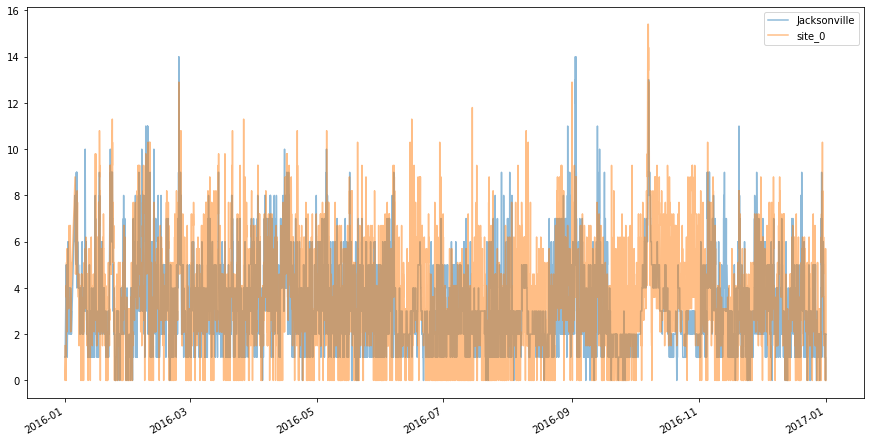

City: Tel Aviv District
Site: site_1


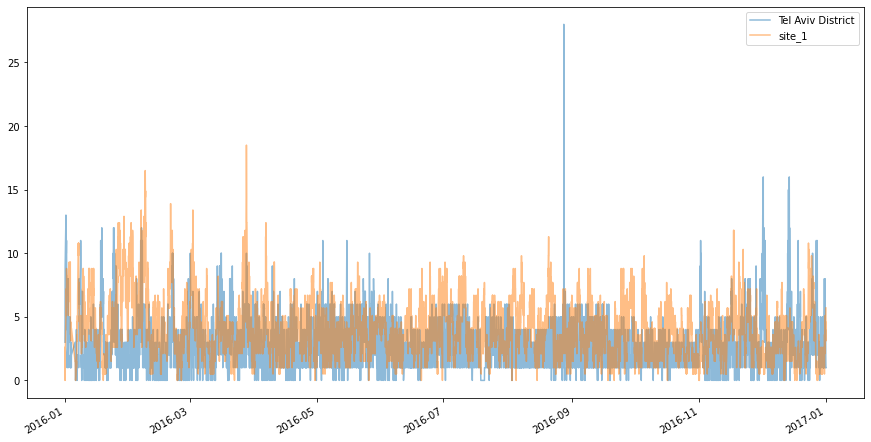

City: Phoenix
Site: site_2


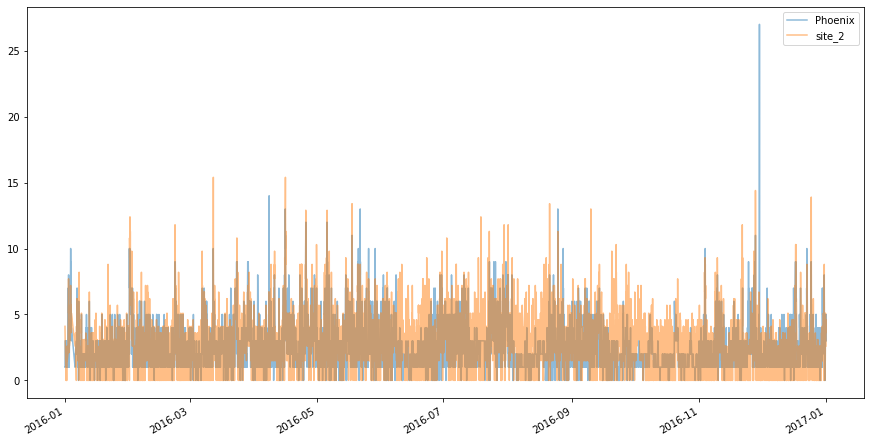

City: Philadelphia
Site: site_3


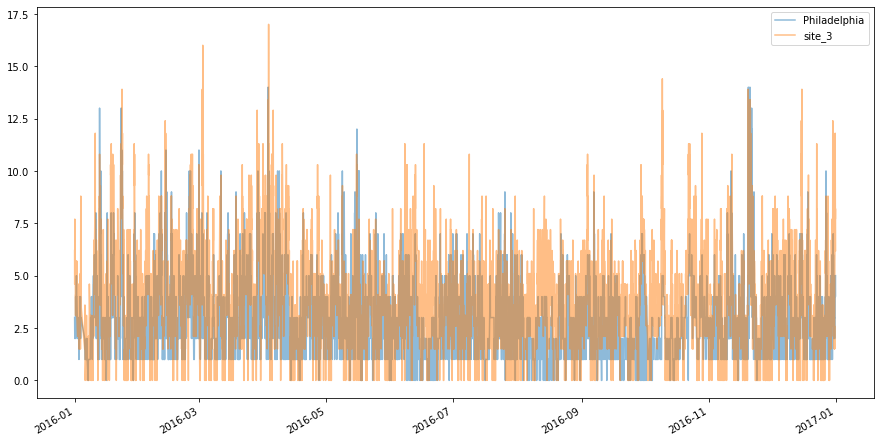

City: San Francisco
Site: site_4


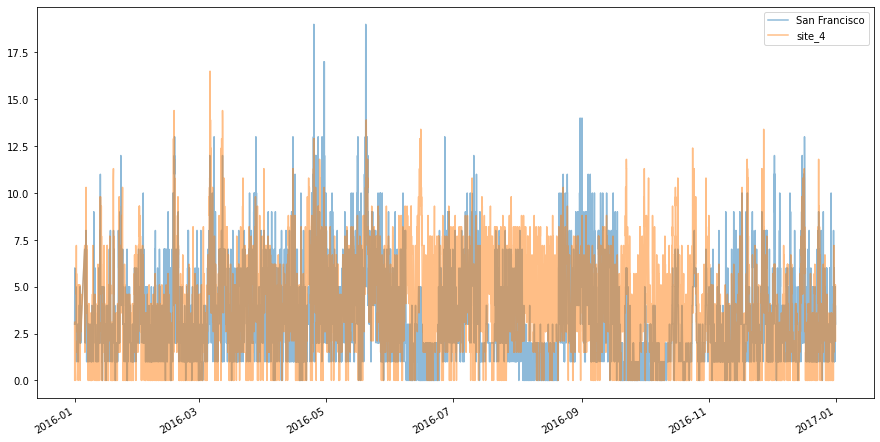

City: Beersheba
Site: site_5


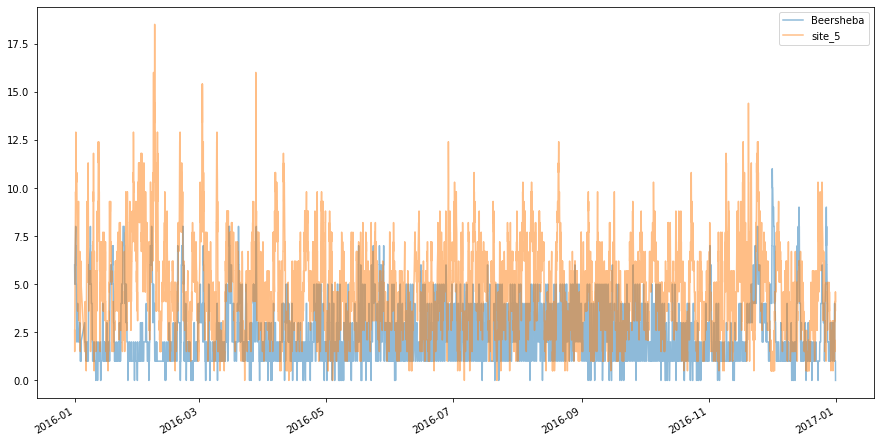

City: Pittsburgh
Site: site_6


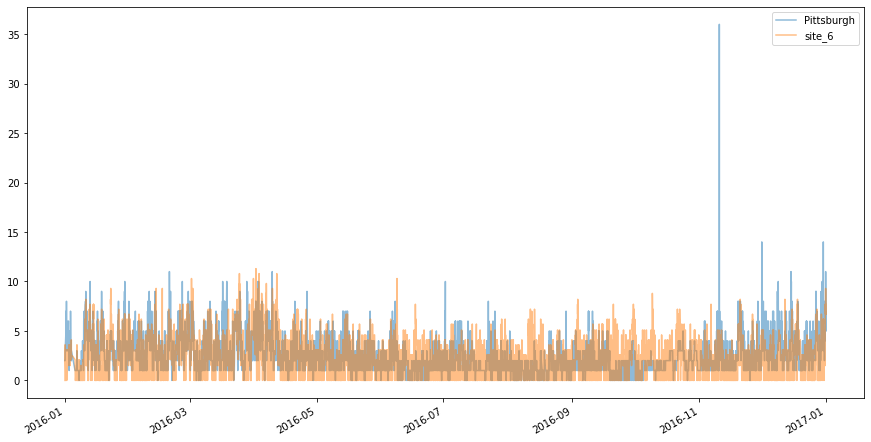

City: Montreal
Site: site_7


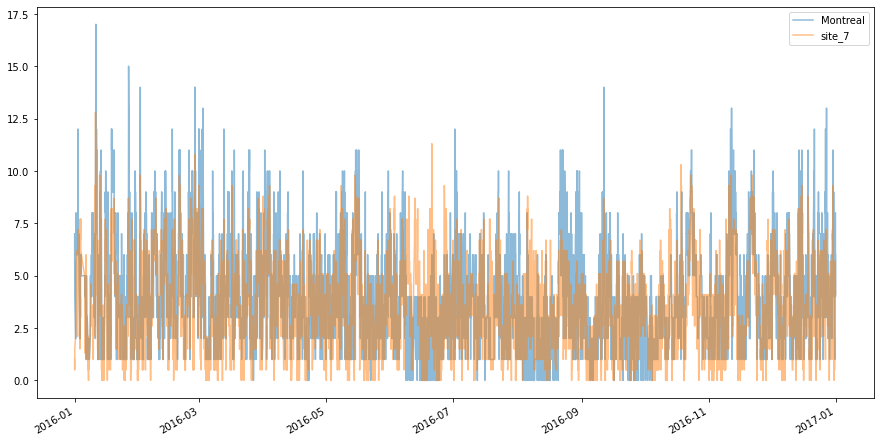

City: Jacksonville
Site: site_8


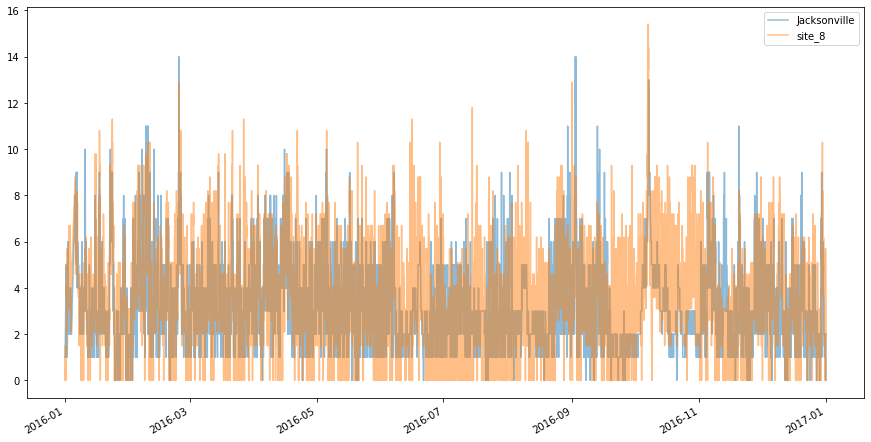

City: San Antonio
Site: site_9


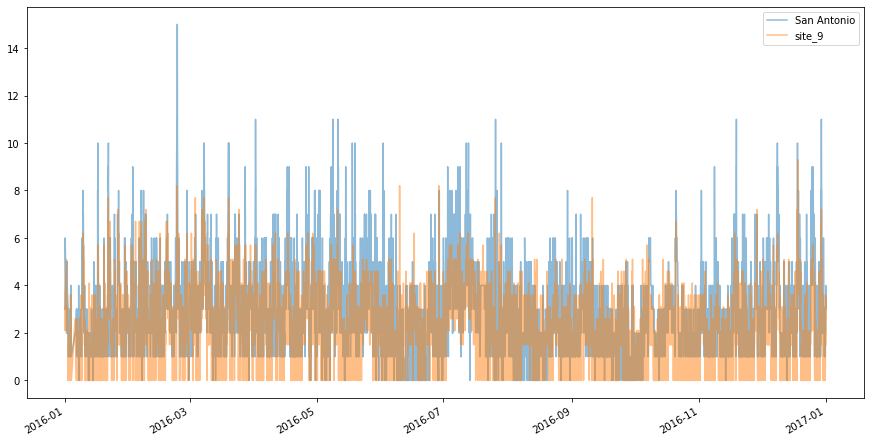

City: Las Vegas
Site: site_10


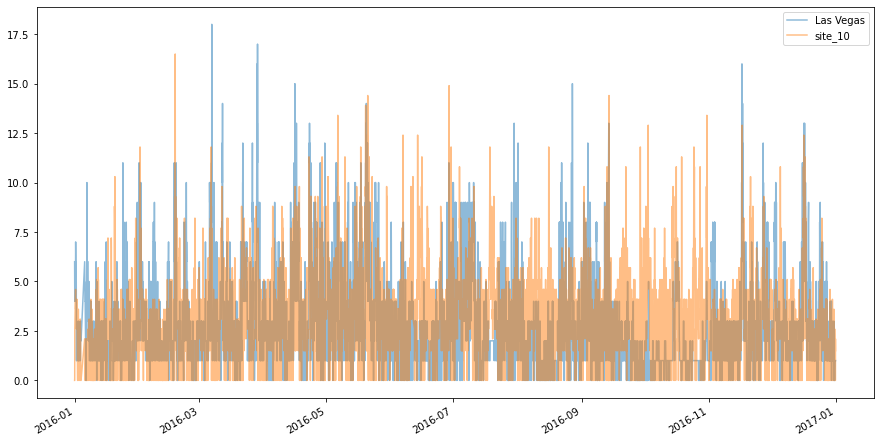

City: Montreal
Site: site_11


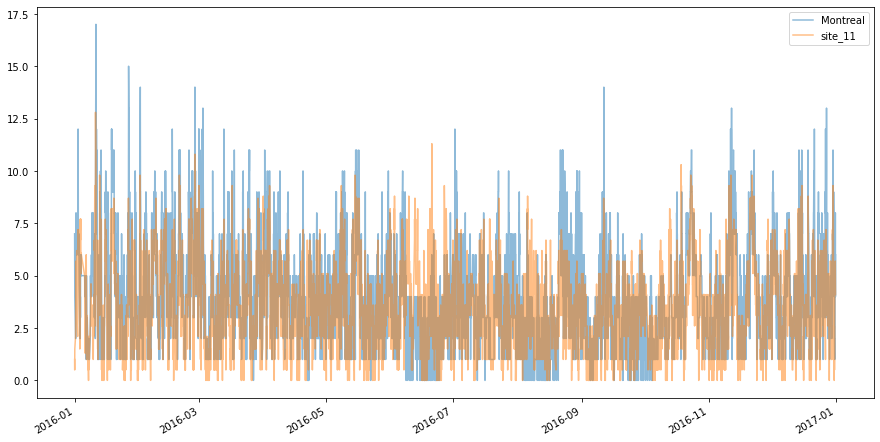

City: Tel Aviv District
Site: site_12


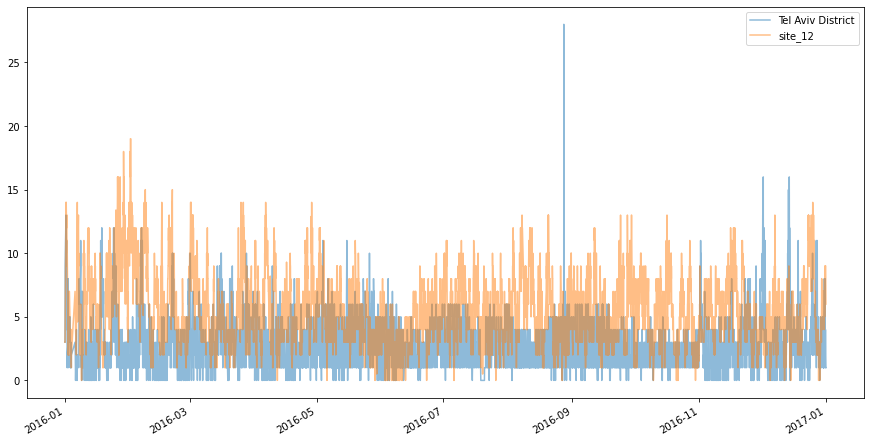

City: Minneapolis
Site: site_13


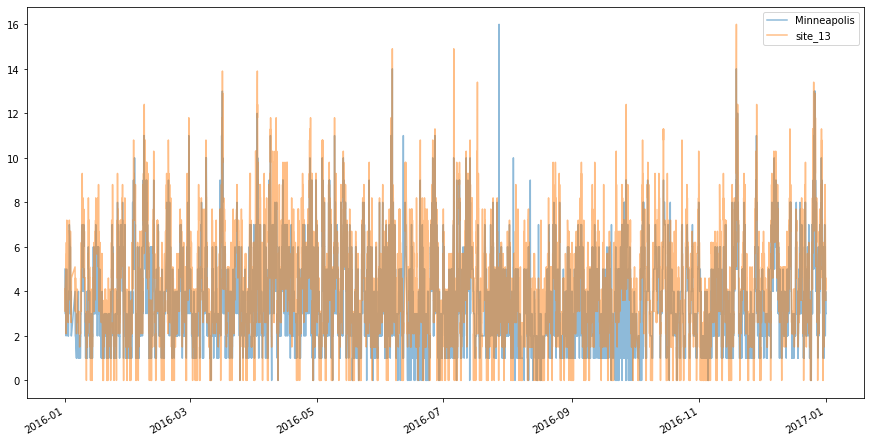

City: Philadelphia
Site: site_14


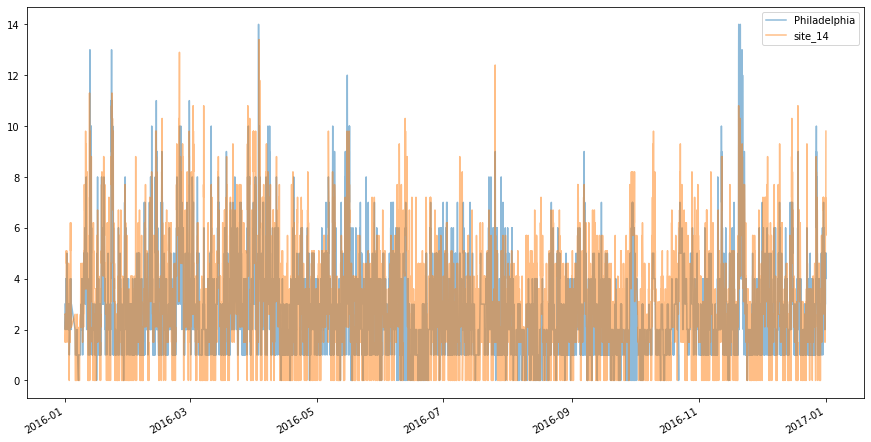

City: Pittsburgh
Site: site_15


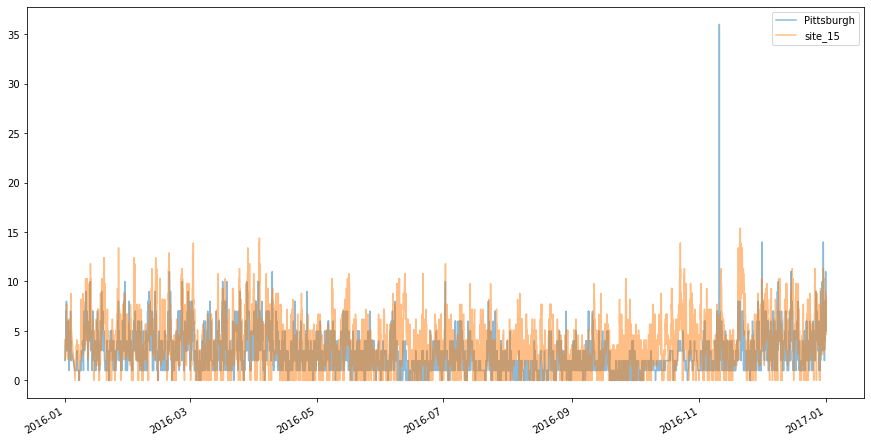

In [45]:
#compare sites & cities in plot
for city, site, corr in zip(df_findCity['city'],df_findCity['site'],df_findCity['corr']):
    if corr > 0.08:
        print('City: ' + city)
        print('Site: ' + site)   
        speed_external[[city,site]].loc['2016'].plot(figsize=(15,8), alpha=0.5)
        plt.show()

# Similarly for Sea Level pressure and Wind Direction

# Wind Direction

In [46]:
#extract wind speed from weather data
wind_direction_pivot=weather_merged.reset_index().pivot_table(index='timestamp',columns='site_id',values='wind_direction')
wind_direction_pivot.columns='site_'+wind_direction_pivot.columns.astype('str')
wind_direction_pivot

site_id,site_0,site_1,site_2,site_3,site_4,site_5,site_6,site_7,site_8,site_9,site_10,site_11,site_12,site_13,site_14,site_15
timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,240.0,270.0,350.0,NaN,NaN,NaN,280.0,0.0,NaN,NaN,280.0,200.0,250.0,NaN,NaN
2016-01-01 01:00:00,70.0,230.0,270.0,350.0,360.0,260.0,0.0,260.0,70.0,20.0,0.0,260.0,190.0,240.0,300.0,330.0
2016-01-01 02:00:00,0.0,0.0,270.0,10.0,0.0,NaN,50.0,350.0,0.0,NaN,0.0,350.0,170.0,240.0,300.0,330.0
2016-01-01 03:00:00,0.0,170.0,280.0,350.0,90.0,160.0,30.0,280.0,0.0,30.0,280.0,280.0,170.0,250.0,NaN,340.0
2016-01-01 04:00:00,250.0,110.0,270.0,340.0,0.0,110.0,50.0,310.0,250.0,10.0,230.0,310.0,130.0,270.0,290.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,170.0,270.0,160.0,110.0,360.0,290.0,0.0,50.0,170.0,240.0,30.0,50.0,260.0,10.0,120.0,150.0
2018-12-31 20:00:00,170.0,270.0,190.0,140.0,360.0,300.0,140.0,60.0,170.0,NaN,40.0,60.0,250.0,360.0,110.0,140.0
2018-12-31 21:00:00,170.0,290.0,310.0,90.0,10.0,300.0,0.0,60.0,170.0,NaN,20.0,60.0,260.0,360.0,110.0,140.0


In [47]:
#load external wind direction data
direction_external = pd.read_csv("../input/historical-hourly-weather-data/wind_direction.csv")
direction_external['datetime'] = pd.to_datetime(direction_external['datetime'])
direction_external.set_index('datetime', inplace=True)

direction_external = direction_external.merge(wind_direction_pivot, left_index=True, right_index=True, how='inner')
direction_external = direction_external.dropna()

direction_external

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,site_6,site_7,site_8,site_9,site_10,site_11,site_12,site_13,site_14,site_15
2016-01-01 01:00:00,278.0,80.0,10.0,15.0,260.0,290.0,360.0,310.0,340.0,0.0,...,0.0,260.0,70.0,20.0,0.0,260.0,190.0,240.0,300.0,330.0
2016-01-01 12:00:00,80.0,93.0,144.0,59.0,21.0,54.0,259.0,320.0,255.0,176.0,...,0.0,200.0,210.0,30.0,300.0,200.0,140.0,220.0,300.0,250.0
2016-01-01 13:00:00,40.0,100.0,360.0,40.0,21.0,54.0,30.0,26.0,130.0,170.0,...,210.0,210.0,0.0,30.0,240.0,210.0,130.0,220.0,270.0,240.0
2016-01-01 14:00:00,100.0,100.0,360.0,30.0,17.0,57.0,360.0,330.0,90.0,120.0,...,200.0,220.0,0.0,10.0,300.0,220.0,130.0,220.0,290.0,240.0
2016-01-01 15:00:00,68.0,90.0,140.0,59.0,30.0,57.0,10.0,26.0,340.0,180.0,...,0.0,220.0,210.0,20.0,280.0,220.0,130.0,230.0,300.0,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-27 20:00:00,280.0,110.0,277.0,320.0,243.0,320.0,120.0,140.0,167.0,120.0,...,160.0,120.0,90.0,360.0,360.0,120.0,250.0,330.0,180.0,170.0
2017-10-27 21:00:00,340.0,100.0,0.0,290.0,260.0,300.0,49.0,60.0,167.0,54.0,...,180.0,100.0,100.0,340.0,290.0,100.0,240.0,340.0,190.0,150.0
2017-10-27 22:00:00,300.0,100.0,0.0,0.0,190.0,330.0,120.0,140.0,230.0,90.0,...,180.0,90.0,90.0,340.0,340.0,90.0,250.0,340.0,180.0,170.0
2017-10-27 23:00:00,272.0,110.0,120.0,300.0,0.0,300.0,130.0,180.0,100.0,90.0,...,0.0,70.0,100.0,360.0,300.0,70.0,250.0,330.0,170.0,160.0


In [48]:
#calculate correlations between sites
df_corr = direction_external.corr(method='spearman')
list_site = wind_direction_pivot.columns
df_corr = df_corr[list_site]
df_corr = df_corr.drop(list_site)
df_corr

,site_0,site_1,site_2,site_3,site_4,site_5,site_6,site_7,site_8,site_9,site_10,site_11,site_12,site_13,site_14,site_15
Vancouver,-0.054551,0.012126,0.152880,-0.028997,0.205276,0.035571,-0.005516,-0.003893,-0.054551,0.021104,0.056404,-0.003893,0.018128,0.005269,-0.064965,-0.030881
Portland,-0.064175,0.055663,0.173541,-0.044626,0.267527,0.072026,-0.069824,0.046930,-0.064175,-0.037994,-0.000565,0.046930,0.027580,-0.108761,-0.033805,-0.117117
San Francisco,0.001836,0.008039,0.055265,-0.029935,0.167073,-0.009225,-0.037668,0.020828,0.001836,-0.046651,0.015062,0.020828,-0.024260,-0.056454,-0.018435,-0.041244
Seattle,-0.023626,0.026062,0.058543,0.010489,0.080983,0.026274,0.016472,0.039460,-0.023626,-0.010093,0.027389,0.039460,0.007903,-0.032638,-0.002447,-0.002289
Los Angeles,-0.036080,-0.007257,0.254226,-0.006637,0.301195,0.037520,0.035457,0.022233,-0.036080,0.001900,0.087694,0.022233,0.018783,-0.036081,-0.031970,-0.027579
San Diego,-0.073146,0.004302,0.196899,-0.012111,0.270758,0.057039,-0.001890,0.056753,-0.073146,0.008227,0.057996,0.056753,0.026274,-0.041397,-0.016332,-0.027792
Las Vegas,0.018438,0.001075,-0.109440,0.003247,-0.173247,-0.034296,-0.011538,-0.029250,0.018438,-0.044216,-0.028707,-0.029250,0.004839,-0.006121,0.025510,-0.018720
Phoenix,-0.035736,0.004534,0.210173,-0.004247,0.066577,0.010452,-0.037512,0.021095,-0.035736,0.011558,0.003080,0.021095,0.027995,-0.027620,-0.021873,-0.034066
Albuquerque,0.014891,0.010708,0.005450,0.001070,-0.100848,0.007536,0.012435,-0.039452,0.014891,0.089303,0.009786,-0.039452,0.009340,-0.003362,-0.017991,0.029789
Denver,-0.023703,0.000218,-0.058982,0.009618,-0.081210,-0.016520,-0.041365,0.021718,-0.023703,-0.044241,-0.037328,0.021718,-0.005983,-0.049238,-0.004455,-0.047838


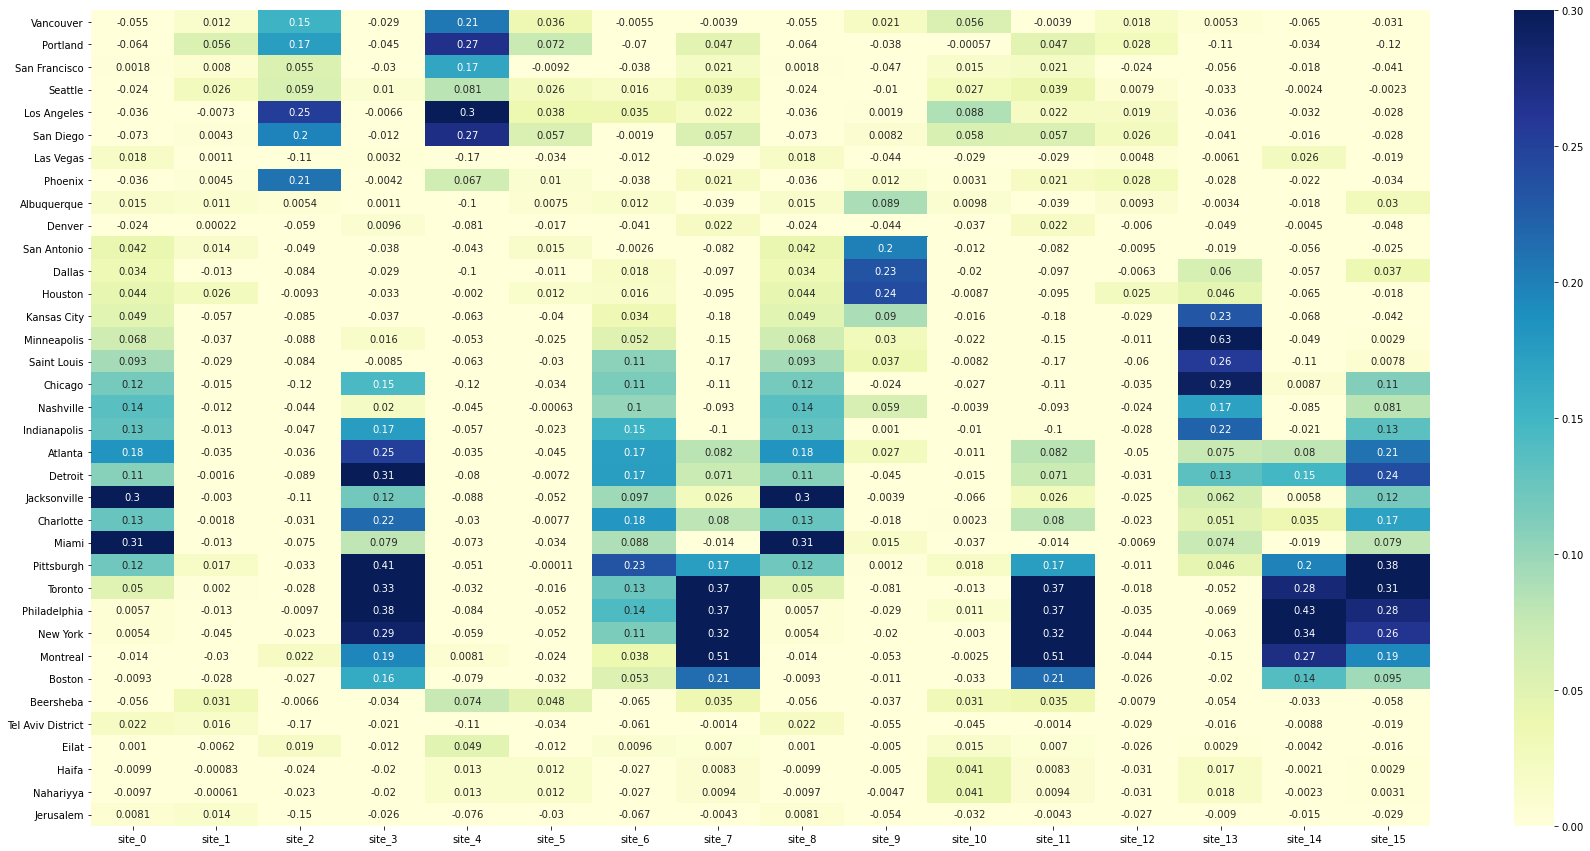

In [49]:
#sns heat map
fig, ax = plt.subplots(figsize=(30,15))   
sns.heatmap(df_corr, annot=True, cmap="YlGnBu", vmin=0,vmax=0.3)

In [50]:
#Get cities!
df_findCity = pd.concat([df_corr.idxmax(),df_corr.max()], axis=1).reset_index().rename(columns={'index':'site',0:'city',1:'corr'})
df_findCity

,site,city,corr
0,site_0,Miami,0.309784
1,site_1,Portland,0.055663
2,site_2,Los Angeles,0.254226
3,site_3,Pittsburgh,0.412054
4,site_4,Los Angeles,0.301195
5,site_5,Portland,0.072026
6,site_6,Pittsburgh,0.234069
7,site_7,Montreal,0.505477
8,site_8,Miami,0.309784
9,site_9,Houston,0.241603


City: Miami
Site: site_0


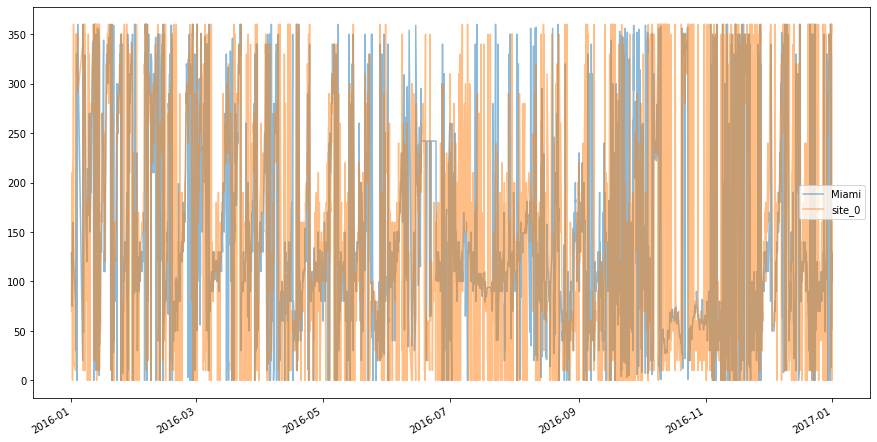

City: Los Angeles
Site: site_2


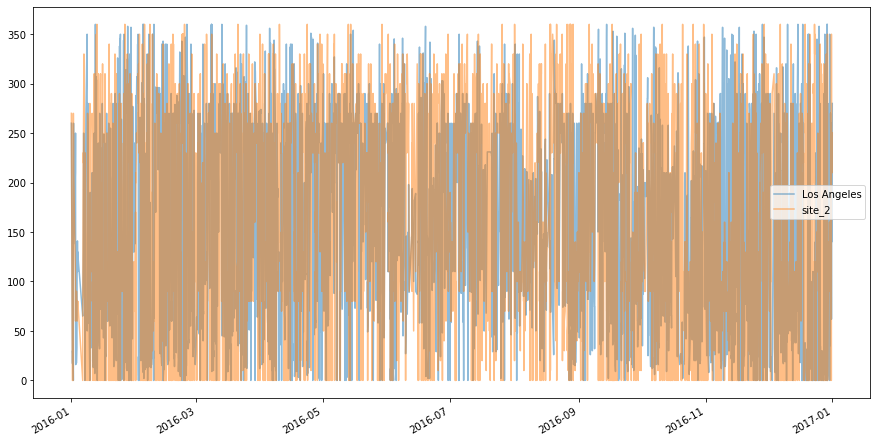

City: Pittsburgh
Site: site_3


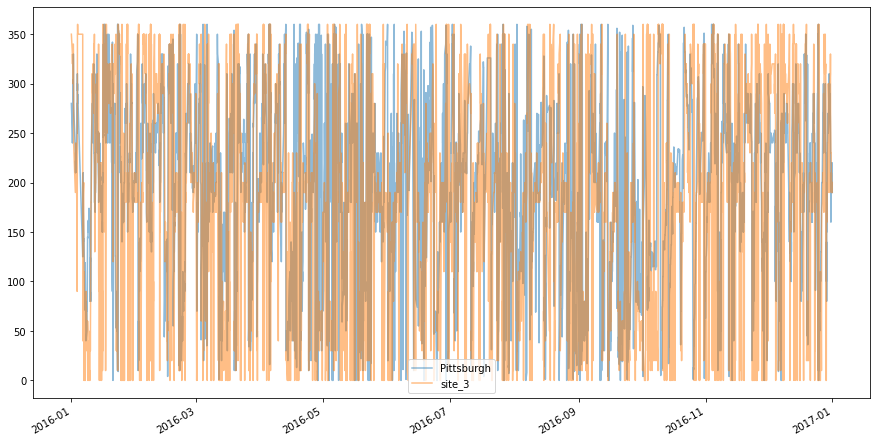

City: Los Angeles
Site: site_4


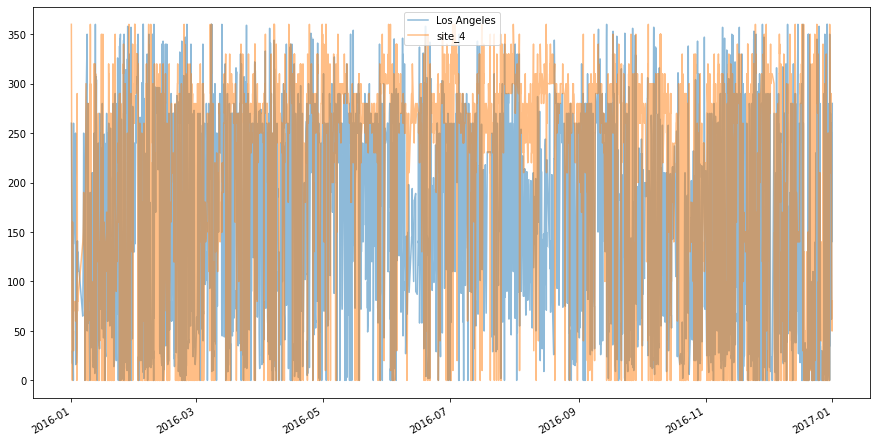

City: Pittsburgh
Site: site_6


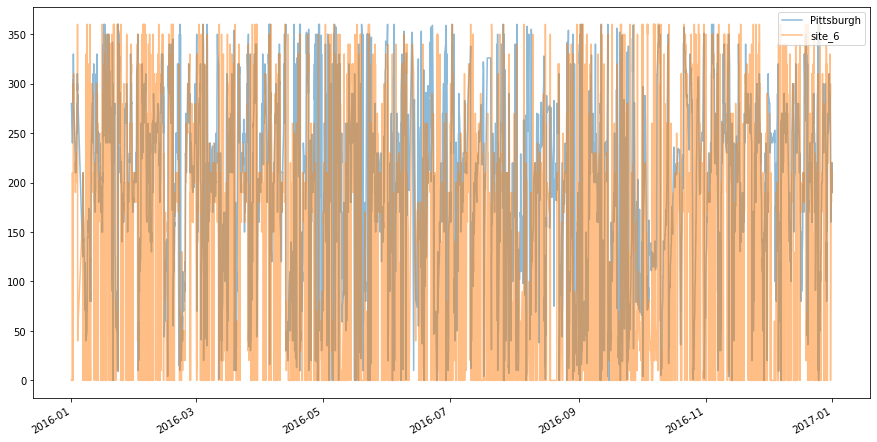

City: Montreal
Site: site_7


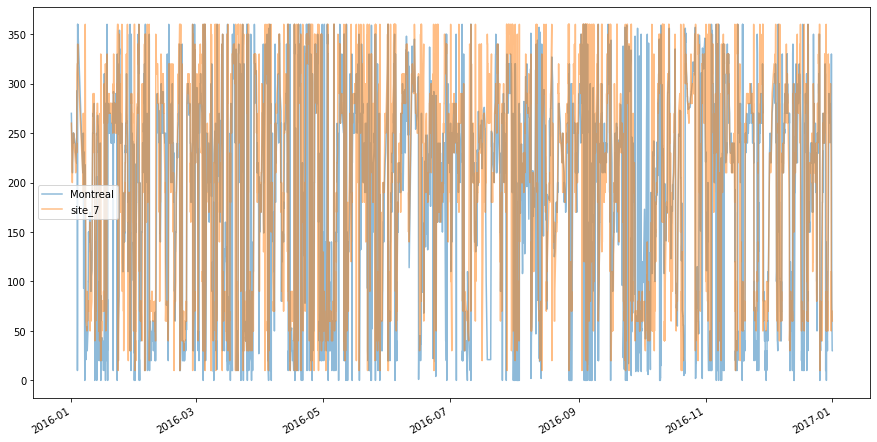

City: Miami
Site: site_8


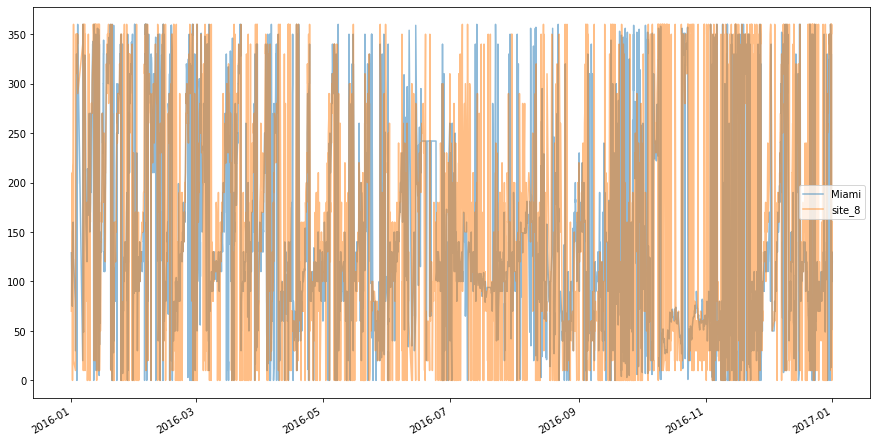

City: Houston
Site: site_9


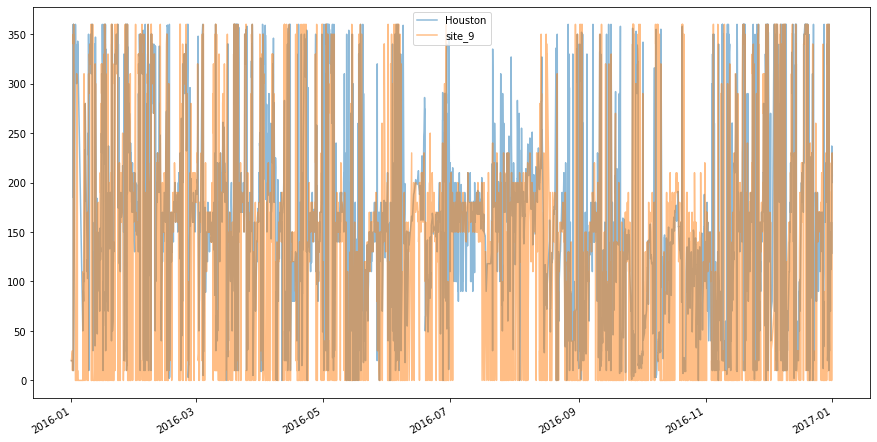

City: Los Angeles
Site: site_10


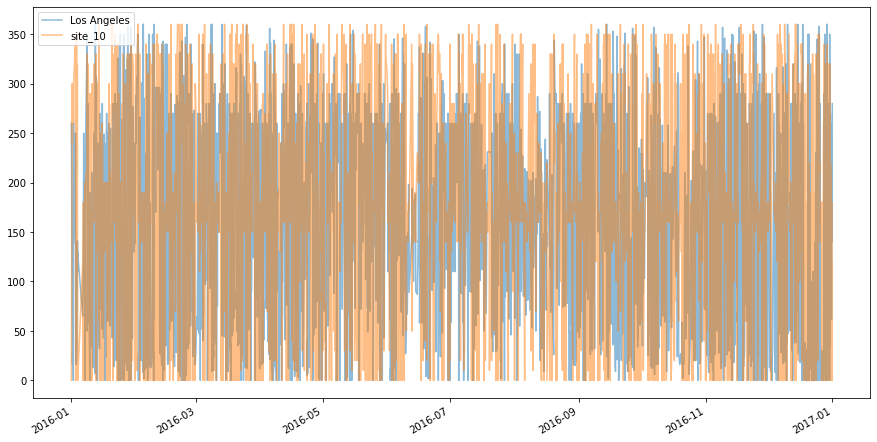

City: Montreal
Site: site_11


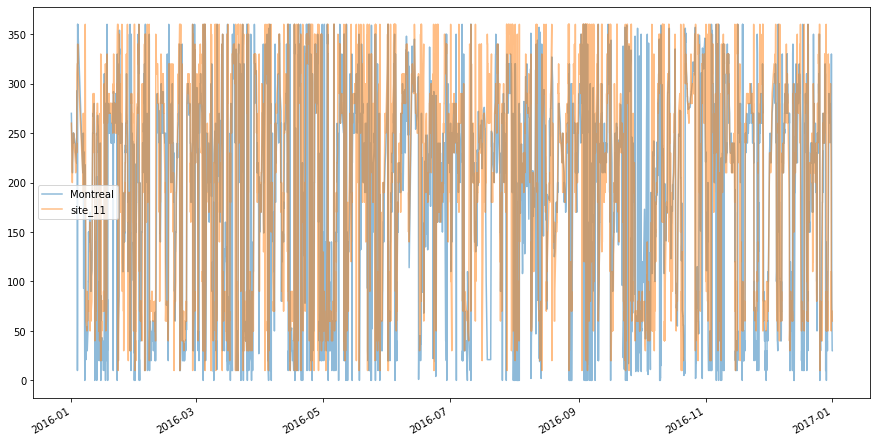

City: Minneapolis
Site: site_13


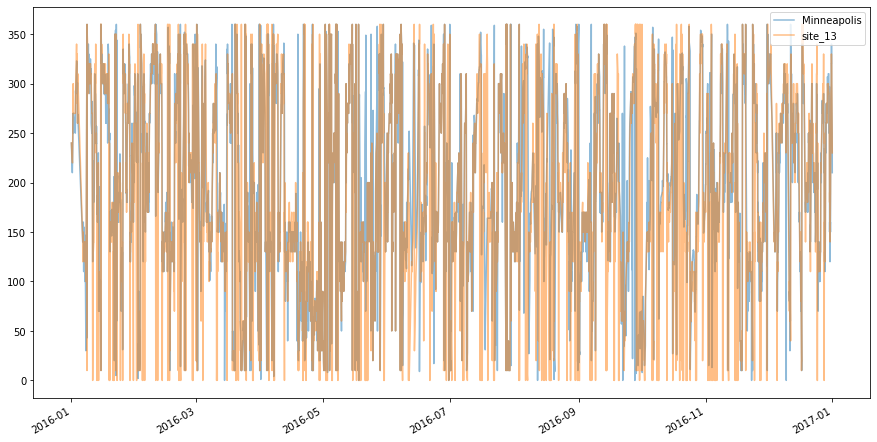

City: Philadelphia
Site: site_14


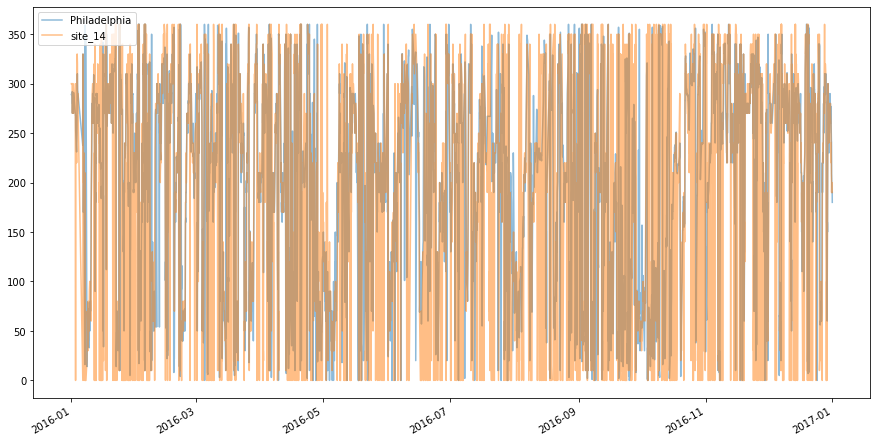

City: Pittsburgh
Site: site_15


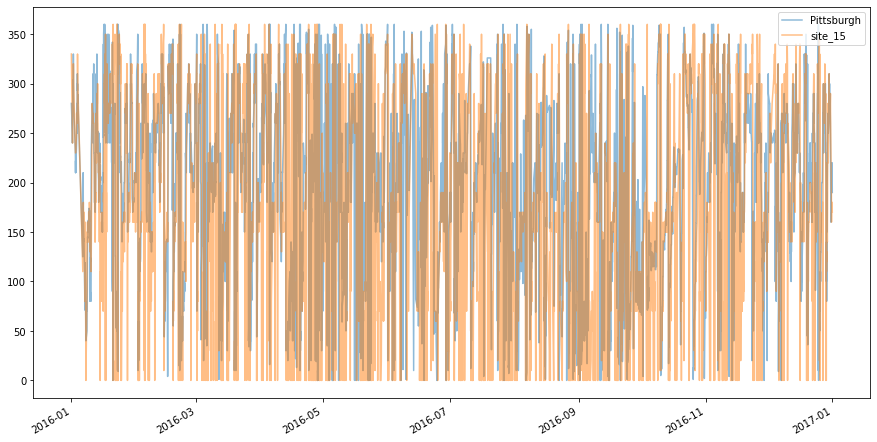

In [51]:
#compare sites & cities in plot
for city, site, corr in zip(df_findCity['city'],df_findCity['site'],df_findCity['corr']):
    if corr > 0.08:
        print('City: ' + city)
        print('Site: ' + site)   
        direction_external[[city,site]].loc['2016'].plot(figsize=(15,8), alpha=0.5)
        plt.show()

# Pressure

In [52]:
#extract wind speed from weather data
sea_level_pivot=weather_merged.reset_index().pivot_table(index='timestamp',columns='site_id',values='sea_level_pressure')
sea_level_pivot.columns='site_' +sea_level_pivot.columns.astype('str')
sea_level_pivot

site_id,site_0,site_1,site_2,site_3,site_4,site_6,site_7,site_8,site_9,site_10,site_11,site_12,site_13,site_14,site_15
timestamp,,,,,,,,,,,,,,,
2016-01-01 00:00:00,1019.7,1020.9,1015.3,1021.1,NaN,NaN,1016.0,1019.7,NaN,NaN,1016.0,1016.2,1023.3,NaN,NaN
2016-01-01 01:00:00,1020.2,1021.6,1015.6,1021.5,1021.4,1019.8,1016.1,1020.2,1027.7,1036.7,1016.1,1016.3,1023.3,1019.3,NaN
2016-01-01 02:00:00,1020.2,1021.9,1016.0,1021.7,1021.6,NaN,1015.8,1020.2,1028.0,1036.9,1015.8,1016.5,1022.9,1019.4,NaN
2016-01-01 03:00:00,1020.1,1022.3,1016.6,1021.7,1021.7,1020.5,1015.4,1020.1,1028.9,1036.9,1015.4,1016.4,1022.7,1019.4,NaN
2016-01-01 04:00:00,1020.0,1022.7,1017.0,1021.8,1021.8,1020.6,1015.1,1020.0,1029.1,1037.8,1015.1,1016.2,1022.8,1019.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,1019.3,1035.3,1009.9,NaN,1017.4,1019.9,1019.6,1019.3,1011.6,1014.4,1019.6,1034.9,1010.9,1023.0,1018.3
2018-12-31 20:00:00,1019.4,1035.2,1008.6,1020.4,1016.4,NaN,1018.3,1019.4,1011.6,1014.4,1018.3,1034.9,1011.6,1022.4,1017.8
2018-12-31 21:00:00,1019.6,1035.3,1008.8,1019.3,1016.4,1017.9,1018.4,1019.6,1012.1,1014.4,1018.4,1034.9,1012.7,1021.1,1017.2


In [53]:
#load external wind direction data
pressure_external = pd.read_csv("../input/historical-hourly-weather-data/pressure.csv")
pressure_external['datetime'] = pd.to_datetime(pressure_external['datetime'])
pressure_external.set_index('datetime', inplace=True)
pressure_external=pressure_external-760
preesure_external = pressure_external.merge(sea_level_pivot, left_index=True, right_index=True, how='inner')
pressure_external = pressure_external.dropna()

pressure_external

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-02 15:00:00,267.0,264.0,256.0,266.0,253.0,254.0,259.0,254.0,266.0,268.0,...,254.0,252.0,242.0,254.0,225.0,253.0,251.0,253.0,253.0,230.0
2012-10-03 09:00:00,249.0,261.0,252.0,262.0,250.0,251.0,254.0,252.0,263.0,260.0,...,255.0,255.0,253.0,253.0,225.0,254.0,253.0,253.0,253.0,231.0
2012-10-03 13:00:00,250.0,262.0,251.0,264.0,250.0,250.0,254.0,252.0,263.0,258.0,...,256.0,257.0,255.0,254.0,225.0,253.0,250.0,253.0,253.0,230.0
2012-10-04 08:00:00,258.0,262.0,249.0,266.0,252.0,252.0,251.0,251.0,258.0,254.0,...,256.0,256.0,258.0,257.0,227.0,256.0,254.0,253.0,253.0,232.0
2012-10-04 12:00:00,259.0,264.0,250.0,287.0,252.0,253.0,251.0,253.0,259.0,255.0,...,257.0,258.0,259.0,260.0,226.0,253.0,251.0,253.0,253.0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-27 20:00:00,264.0,260.0,255.0,263.0,254.0,255.0,258.0,253.0,261.0,265.0,...,258.0,259.0,255.0,257.0,225.0,251.0,250.0,263.0,263.0,251.0
2017-10-27 21:00:00,263.0,259.0,254.0,262.0,253.0,253.0,257.0,252.0,260.0,265.0,...,258.0,259.0,255.0,257.0,225.0,251.0,251.0,263.0,263.0,251.0
2017-10-27 22:00:00,262.0,259.0,254.0,261.0,252.0,253.0,256.0,251.0,260.0,264.0,...,258.0,259.0,256.0,258.0,225.0,251.0,251.0,263.0,263.0,251.0


In [54]:
#calculate correlations between sites
df_corr = direction_external.corr(method='spearman')
list_site = wind_direction_pivot.columns
df_corr = df_corr[list_site]
df_corr = df_corr.drop(list_site)
df_corr

,site_0,site_1,site_2,site_3,site_4,site_5,site_6,site_7,site_8,site_9,site_10,site_11,site_12,site_13,site_14,site_15
Vancouver,-0.054551,0.012126,0.152880,-0.028997,0.205276,0.035571,-0.005516,-0.003893,-0.054551,0.021104,0.056404,-0.003893,0.018128,0.005269,-0.064965,-0.030881
Portland,-0.064175,0.055663,0.173541,-0.044626,0.267527,0.072026,-0.069824,0.046930,-0.064175,-0.037994,-0.000565,0.046930,0.027580,-0.108761,-0.033805,-0.117117
San Francisco,0.001836,0.008039,0.055265,-0.029935,0.167073,-0.009225,-0.037668,0.020828,0.001836,-0.046651,0.015062,0.020828,-0.024260,-0.056454,-0.018435,-0.041244
Seattle,-0.023626,0.026062,0.058543,0.010489,0.080983,0.026274,0.016472,0.039460,-0.023626,-0.010093,0.027389,0.039460,0.007903,-0.032638,-0.002447,-0.002289
Los Angeles,-0.036080,-0.007257,0.254226,-0.006637,0.301195,0.037520,0.035457,0.022233,-0.036080,0.001900,0.087694,0.022233,0.018783,-0.036081,-0.031970,-0.027579
San Diego,-0.073146,0.004302,0.196899,-0.012111,0.270758,0.057039,-0.001890,0.056753,-0.073146,0.008227,0.057996,0.056753,0.026274,-0.041397,-0.016332,-0.027792
Las Vegas,0.018438,0.001075,-0.109440,0.003247,-0.173247,-0.034296,-0.011538,-0.029250,0.018438,-0.044216,-0.028707,-0.029250,0.004839,-0.006121,0.025510,-0.018720
Phoenix,-0.035736,0.004534,0.210173,-0.004247,0.066577,0.010452,-0.037512,0.021095,-0.035736,0.011558,0.003080,0.021095,0.027995,-0.027620,-0.021873,-0.034066
Albuquerque,0.014891,0.010708,0.005450,0.001070,-0.100848,0.007536,0.012435,-0.039452,0.014891,0.089303,0.009786,-0.039452,0.009340,-0.003362,-0.017991,0.029789
Denver,-0.023703,0.000218,-0.058982,0.009618,-0.081210,-0.016520,-0.041365,0.021718,-0.023703,-0.044241,-0.037328,0.021718,-0.005983,-0.049238,-0.004455,-0.047838


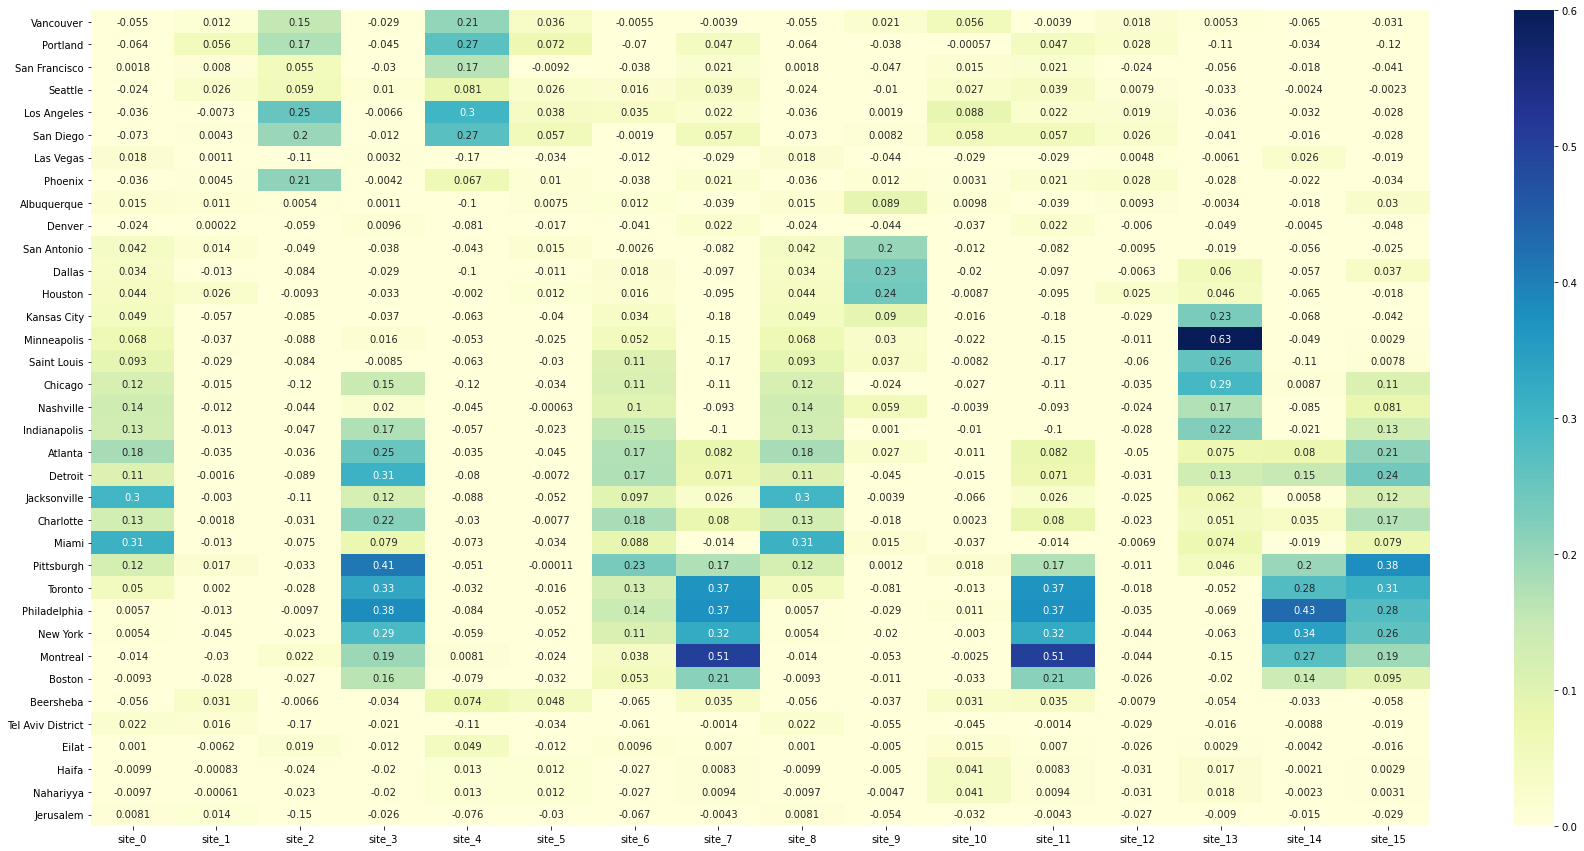

In [55]:
#sns heat map
fig, ax = plt.subplots(figsize=(30,15))   
sns.heatmap(df_corr, annot=True, cmap="YlGnBu", vmin=0,vmax=0.6)

In [56]:
#Get cities!
df_findCity = pd.concat([df_corr.idxmax(),df_corr.max()], axis=1).reset_index().rename(columns={'index':'site',0:'city',1:'corr'})
df_findCity

,site,city,corr
0,site_0,Miami,0.309784
1,site_1,Portland,0.055663
2,site_2,Los Angeles,0.254226
3,site_3,Pittsburgh,0.412054
4,site_4,Los Angeles,0.301195
5,site_5,Portland,0.072026
6,site_6,Pittsburgh,0.234069
7,site_7,Montreal,0.505477
8,site_8,Miami,0.309784
9,site_9,Houston,0.241603
